### Linear Regression: Daily Mean Apparent Temperature with Power Demand

In [2]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('../data/daily-weather-power/dhaka/2022-01-01-2022-12-31.csv')
df

,date,power_demand,load_shed,rainfall,mean_apparent_temperature
0,2022-01-01,3061.0,0.0,0.0,18.1
1,2022-01-02,3233.0,0.0,0.0,18.2
2,2022-01-03,3233.0,0.0,0.0,18.1
3,2022-01-04,3259.0,0.0,0.0,18.0
4,2022-01-05,3152.0,0.0,0.0,17.7
...,...,...,...,...,...
360,2022-12-27,3601.0,0.0,0.5,22.5
361,2022-12-28,3534.0,0.0,0.5,21.3
362,2022-12-29,3480.0,0.0,0.0,16.9
363,2022-12-30,2853.0,0.0,0.0,18.0


In [57]:
df = pd.read_csv('../data/daily-weather-power/dhaka/2020-01-01-2023-09-30.csv')
df

,date,power_demand,load_shed,rainfall,mean_apparent_temperature
0,2020-01-01,2844.0,0.0,0.0,20.6
1,2020-01-02,2989.0,0.0,0.0,21.7
2,2020-01-03,NaN,NaN,4.6,20.0
3,2020-01-04,2375.0,0.0,0.0,19.2
4,2020-01-05,2803.0,0.0,0.3,18.0
...,...,...,...,...,...
1364,2023-09-26,5017.0,22.0,0.7,35.7
1365,2023-09-27,5078.0,0.0,1.1,37.0
1366,2023-09-28,4863.0,0.0,0.6,37.5
1367,2023-09-29,4257.0,0.0,3.8,36.8


In [66]:
df = pd.read_csv('../data/daily-weather-power/dhaka/2023-01-01-2023-09-30.csv')
df

,date,power_demand,load_shed,rainfall,mean_apparent_temperature
0,2023-01-01,3119,0,0.0,18.1
1,2023-01-02,3354,0,0.0,18.4
2,2023-01-03,3397,0,0.0,17.9
3,2023-01-04,3491,0,0.0,17.3
4,2023-01-05,3430,0,0.0,17.1
...,...,...,...,...,...
268,2023-09-26,5017,22,0.7,35.7
269,2023-09-27,5078,0,1.1,37.0
270,2023-09-28,4863,0,0.6,37.5
271,2023-09-29,4257,0,3.8,36.8


In [75]:
df = pd.read_csv('../data/daily-weather-power/dhaka/2016-01-01-2023-09-30.csv')
df

,date,power_demand,load_shed,rainfall,mean_apparent_temperature
0,2016-01-01,1836.0,0.0,0.0,20.0
1,2016-01-02,2249.0,0.0,0.0,20.3
2,2016-01-03,2316.0,0.0,0.0,20.1
3,2016-01-04,2331.0,0.0,0.0,19.1
4,2016-01-05,2279.0,0.0,0.0,19.2
...,...,...,...,...,...
2825,2023-09-26,5017.0,22.0,0.7,35.7
2826,2023-09-27,5078.0,0.0,1.1,37.0
2827,2023-09-28,4863.0,0.0,0.6,37.5
2828,2023-09-29,4257.0,0.0,3.8,36.8


**Data Preprocessing: Fill NA values with median value of a column**

In [76]:
df.power_demand.median()

3409.5

In [77]:
df.power_demand = df.power_demand.fillna(df.power_demand.median())
df

,date,power_demand,load_shed,rainfall,mean_apparent_temperature
0,2016-01-01,1836.0,0.0,0.0,20.0
1,2016-01-02,2249.0,0.0,0.0,20.3
2,2016-01-03,2316.0,0.0,0.0,20.1
3,2016-01-04,2331.0,0.0,0.0,19.1
4,2016-01-05,2279.0,0.0,0.0,19.2
...,...,...,...,...,...
2825,2023-09-26,5017.0,22.0,0.7,35.7
2826,2023-09-27,5078.0,0.0,1.1,37.0
2827,2023-09-28,4863.0,0.0,0.6,37.5
2828,2023-09-29,4257.0,0.0,3.8,36.8


In [78]:
df = df.drop('load_shed', axis='columns')
df = df.drop('date', axis='columns')
df = df.drop('rainfall', axis='columns')
df

,power_demand,mean_apparent_temperature
0,1836.0,20.0
1,2249.0,20.3
2,2316.0,20.1
3,2331.0,19.1
4,2279.0,19.2
...,...,...
2825,5017.0,35.7
2826,5078.0,37.0
2827,4863.0,37.5
2828,4257.0,36.8


In [79]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('power_demand',axis='columns'),df.power_demand)

LinearRegression()

In [80]:
reg.coef_

array([67.0220383])

In [81]:
reg.intercept_

1539.1137903620456

**Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old**

In [82]:
reg.predict([[32.2]])

c:\Users\rudro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3697.2234235])

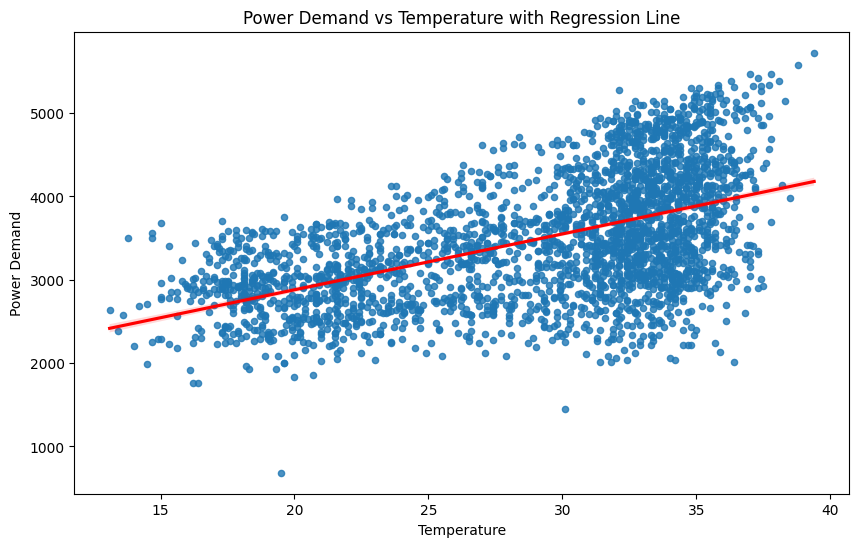

In [83]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='mean_apparent_temperature', y='power_demand', scatter_kws={"s": 20}, line_kws={"color": "red"})

plt.title('Power Demand vs Temperature with Regression Line')
plt.xlabel('Temperature')
plt.ylabel('Power Demand')

plt.show()

### Observations:
- Instead of combining every year's data into a single giant dataset, it _might_ be better to run regression analysis on datasets belong to a particular year.

- Over a long period of time, many other factors influence power demand, such as- increase in population, rapid industrialization etc. which are not part of our dataset.

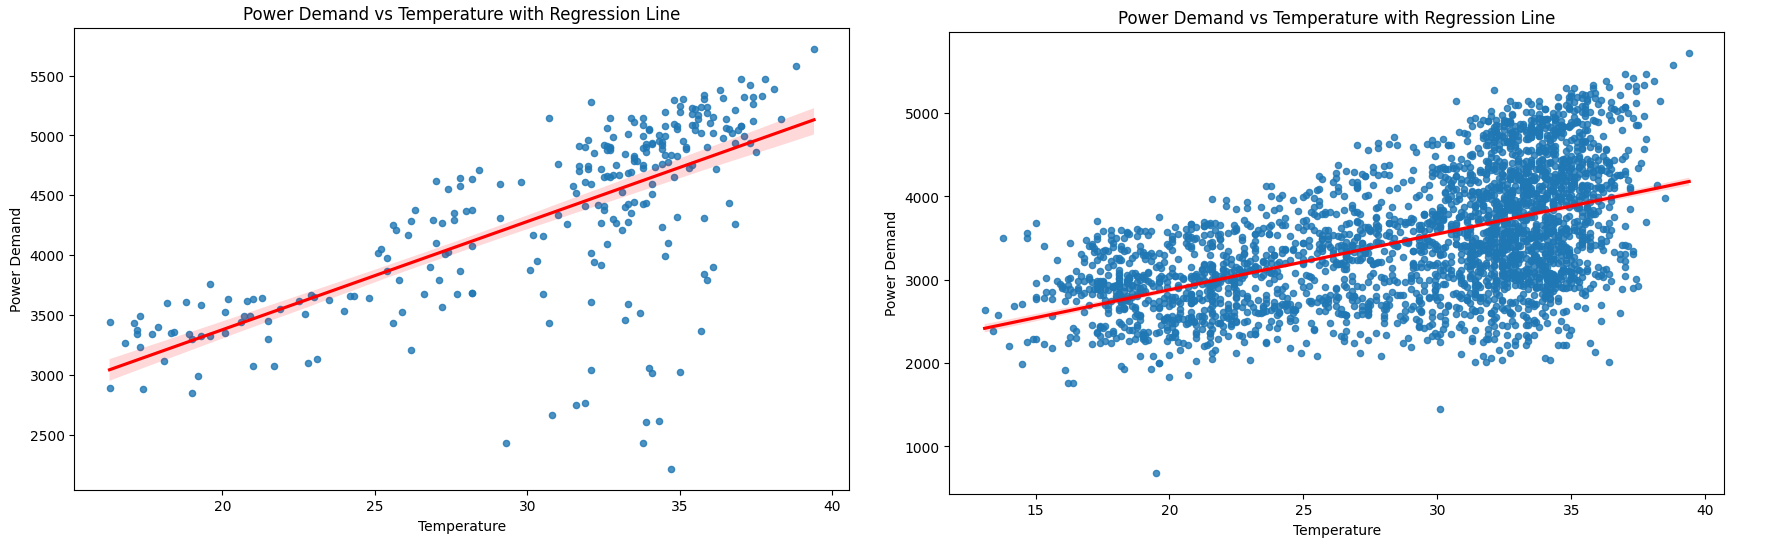